### Contents
A Quadratic Relationship<br>
&emsp;Create Quadratic Data<br>
&emsp;Plot Quadratic Data<br>
&emsp;Design a Model (Linear Layers Only - No Activation)<br>
&emsp;Train the Model<br>
&emsp;Plot Labels and Predictions<br>
&emsp;Re-design the Model (Add Activations)<br>
&emsp;Train the Model Again<br>
&emsp;Plot Labels and Predictions<br>

In [2]:
from typing import List, Tuple

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import Tensor

import utilities as util

Create Quadratic Data

In [3]:
def create_quadratic_data(a:float, b: float, c:float) -> Tuple[List[float], List[float]]:
    X = [float(x*.1) for x in range(-10, 11)]
    y = [a*(x**2)+(b*x)+c for x in X]
    X, y = np.array(X, dtype=np.float32), np.array(y, np.float32)
    X = np.reshape(X, (len(X), 1))
    y = np.reshape(y, (len(y), 1))
    return X, y

X_train, y_train = create_quadratic_data(5, 2, 3)

print('X_train Dimenstions:',X_train.ndim)
print('X_train Shape:', X_train.shape)
print(X_train[:2])

print('y_train Dimenstions:',y_train.ndim)
print('y_train Shape:', y_train.shape)
print(y_train[:2])

X_train Dimenstions: 2
X_train Shape: (21, 1)
[[-1. ]
 [-0.9]]
y_train Dimenstions: 2
y_train Shape: (21, 1)
[[6.  ]
 [5.25]]


Plot Quadratic Data

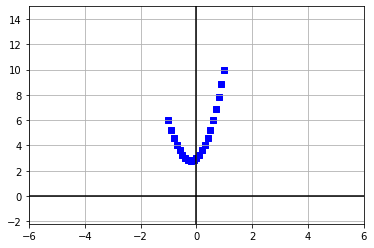

In [4]:
util.plot_data(X_train, y_train)

Design a Model (Linear Layers Only - No Activation)

In [5]:
class MultiLayerModel(nn.Module):

    def __init__(self):
        super(MultiLayerModel, self).__init__()

        self.linear1 = nn.Linear(1, 20, bias=True)
        self.linear2 = nn.Linear(20, 20, bias=True)
        self.linear3 = nn.Linear(20, 1, bias=True)

    def forward(self, x, log=False):
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.linear3(out)
        return out

Train the Model

In [6]:
# Configuration needed for training the model.
config = {
    'epochs': 100,
    'lr': 0.01,
    'loss_function': nn.MSELoss()
}

model = MultiLayerModel()
model, losses = util.train_model(model, config, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
util.print_results(model, losses)

0 : 77.50245755456854
10 : 29.615415192442015
20 : 28.043536255136132
30 : 27.760135722812265
40 : 28.037089253775775
50 : 28.573911742772907
60 : 29.200073747895658
70 : 29.800236904178746
80 : 30.30101412156364
90 : 30.67076532218198
99 : 30.894115877501463


Plot Labels and Predictions

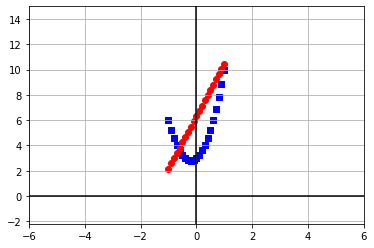

In [7]:
#model.eval() # Tell the model we are evaluating it so that it does not learn or dropout.
predictions = [model(torch.from_numpy(X)).detach().item() for X in X_train]
util.plot_data(np.array(X_train), np.array(y_train), np.array(predictions))

Re-design the Model (Add Activations)

In [8]:
class QuadraticRegressionModel(nn.Module):

    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()

        self.linear1 = nn.Linear(1, 20, bias=True)
        self.linear2 = nn.Linear(20, 20, bias=True)
        self.linear3 = nn.Linear(20, 1, bias=True)
        self.prelu = nn.PReLU(1, 0.25)

    def forward(self, x, log=False):
        #x = F.dropout(self.prelu(self.linear1(x)), p=0.5)
        #x = F.relu(self.linear2(x))
        #x = self.linear3(x)
        
        out = self.linear1(x)
        out = F.relu(out)
        #out = self.prelu(out)
        #out = F.dropout(out, p=0.5)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        return out

Train the Model Again

In [9]:
# Using the same config as before.

model = QuadraticRegressionModel()
model, losses = util.train_model(model, config, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
util.print_results(model, losses)

0 : 154.0883406996727
10 : 9.226368439711223
20 : 3.367950015490351
30 : 2.650531740160659
40 : 1.9259174339495075
50 : 1.355936607975309
60 : 0.9333313365095819
70 : 0.6639281938605563
80 : 0.4897018525734893
90 : 0.4035242002646555
99 : 0.35524103925217787


Plot Labels and Predictions

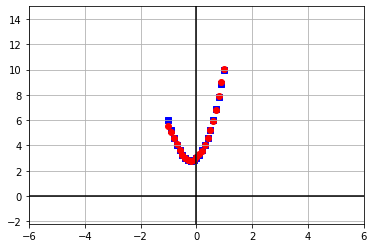

In [10]:
#model.eval() # Tell the model we are evaluating it so that it does not learn or dropout.
predictions = [model(torch.from_numpy(X)).detach().item() for X in X_train]
util.plot_data(np.array(X_train), np.array(y_train), np.array(predictions))